# **Data Understanding**

In [ ]:
# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Untuk pengolahan data
import numpy as np
import pandas as pd

# Untuk pembuatan model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dataset = pd.read_csv('Hotels_Jakarta.csv')

In [ ]:
dataset.head()

,hotel_name,hotel_name_link,review_score,review_score_text,review_score_title,hotel_image,hotel_price
0,Ascott Sudirman Jakarta,\n/hotel/id/ascott-sudirman-jakarta-jakarta.en...,8.7,"1,259 reviews",Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,062,187"
1,Ascott Jakarta,\n/hotel/id/ascott-jakarta.en-gb.html?aid=3041...,8.6,"1,811 reviews",Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 934,725"
2,Four Seasons Hotel Jakarta,\n/hotel/id/four-seasons-jakarta-jakarta.en-gb...,9.2,409 reviews,Superb,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 2,763,882"
3,Shangri-La Hotel Jakarta,\n/hotel/id/shangri-la-jakarta.en-gb.html?aid=...,8.9,685 reviews,Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,667,597"
4,Ascott Kuningan Jakarta,\n/hotel/id/ascott-kuningan-jakarta.en-gb.html...,8.6,865 reviews,Fabulous,https://cf.bstatic.com/xdata/images/hotel/squa...,"Rp 1,274,625"


In [ ]:
dataset.shape

(676, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_name          676 non-null    object 
 1   hotel_name_link     676 non-null    object 
 2   review_score        676 non-null    float64
 3   review_score_text   676 non-null    object 
 4   review_score_title  676 non-null    object 
 5   hotel_image         676 non-null    object 
 6   hotel_price         676 non-null    object 
dtypes: float64(1), object(6)
memory usage: 37.1+ KB


#**Exploratory Data Analysis**

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



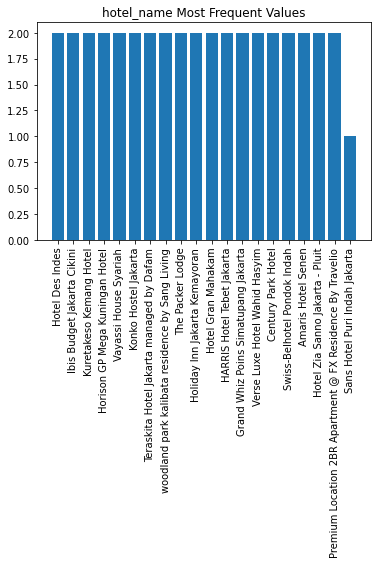

----------------------------------------------------------------------------------------------------


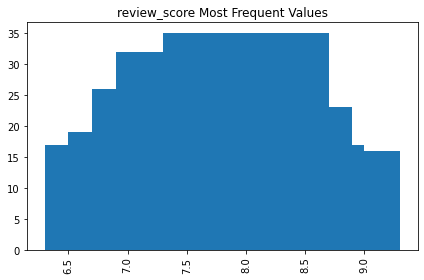

----------------------------------------------------------------------------------------------------


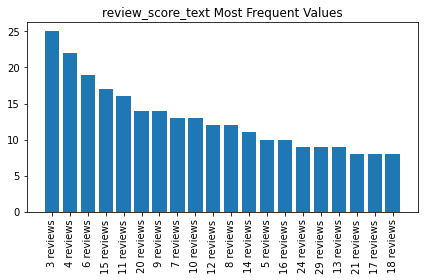

----------------------------------------------------------------------------------------------------


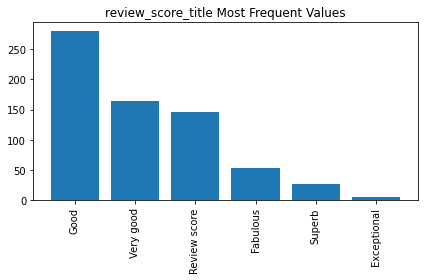

----------------------------------------------------------------------------------------------------


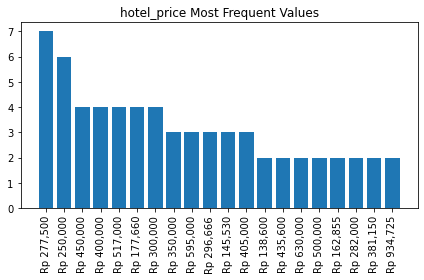

In [ ]:
# visualisasi most frequent values di dataset
for column in ('hotel_name', 'review_score', 'review_score_text', 'review_score_title', 'hotel_price'):
    print('-' * 100)
    counts = dataset[column].value_counts().nlargest(20)
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.title(f'{column} Most Frequent Values')
    plt.tight_layout()
    plt.show()

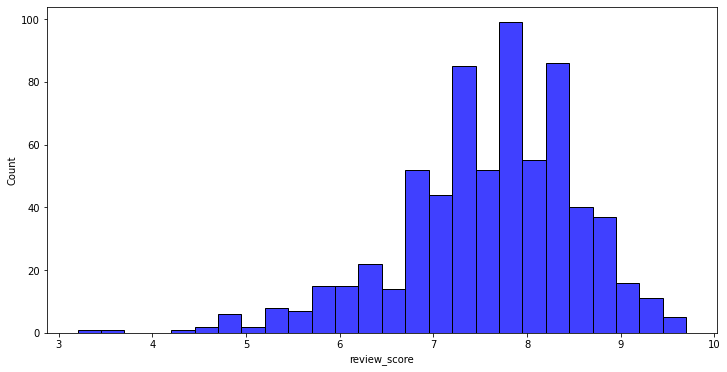

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(dataset, x = dataset['review_score'], color='b')

<function matplotlib.pyplot.plot>

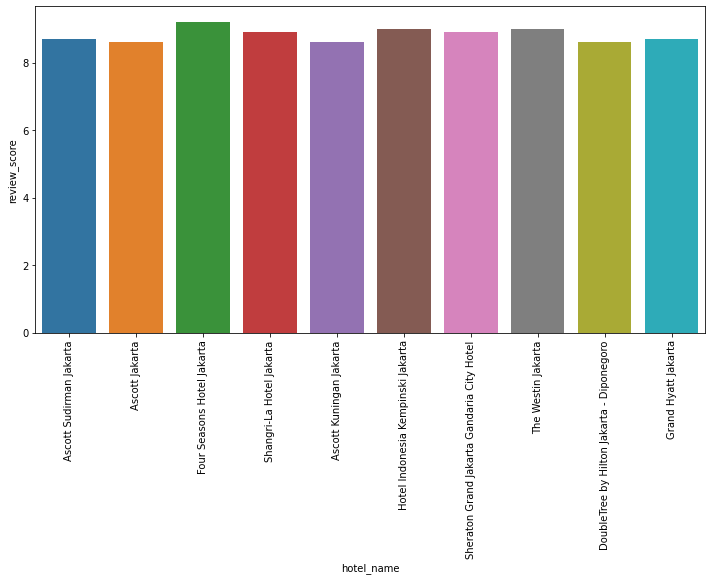

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x='hotel_name',y='review_score',data=dataset.iloc[:10,:])
plt.xticks(rotation=90)
plt.plot

#**Data Preparation**

In [ ]:
dataset.isnull().sum()

hotel_name            0
hotel_name_link       0
review_score          0
review_score_text     0
review_score_title    0
hotel_image           0
hotel_price           0
dtype: int64

In [ ]:
#dataset.rename(columns = {'hotel_name':'name', 'hotel_name_link': 'hotel_link', 'review_score': 'review', 'review_score_text': 'total_review', 'review_score_title': 'review_title', 'hotel_image': 'image', 'hotel_price': 'price'},inplace = True)

In [ ]:
# Mengidentifikasi fitur yang digunakan untuk mencari rekomendasi
dataset_columns = ['hotel_name','review_score_text', 'review_score_title', 'hotel_price']
dataset = dataset[dataset_columns]

In [ ]:
# Function untuk mengubah huruf menjadi huruf kecil
def data_cleaning(x):
    return str.lower(x.replace(" ", ""))

In [ ]:
# Menampilkan data
for dataset_column in dataset_columns:
  dataset[dataset_column] = dataset[dataset_column].apply(data_cleaning)

dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel_name,review_score_text,review_score_title,hotel_price
0,ascottsudirmanjakarta,"1,259reviews",fabulous,"rp 1,062,187"
1,ascottjakarta,"1,811reviews",fabulous,"rp 934,725"
2,fourseasonshoteljakarta,409reviews,superb,"rp 2,763,882"
3,shangri-lahoteljakarta,685reviews,fabulous,"rp 1,667,597"
4,ascottkuninganjakarta,865reviews,fabulous,"rp 1,274,625"


#**Modeling**

In [ ]:
# Memberikan nilai bobot dengan TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Membangun matriks TF-IDF dengan fitting dan transformasi data
tfidf_matrix = tfidf.fit_transform(dataset['hotel_price'])

print("Shape TF-IDF :", tfidf_matrix.shape)

Shape TF-IDF : (676, 569)


In [ ]:
# Menghitung nilai cosine similarity
cosine_simA = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Buat variabel indicies sebagai set indexing utama
indices = pd.Series(dataset.index, index = dataset['hotel_name'])

# Function untuk mendapatkan rekomendasi
def hotel_recommendation(hotel_name, cosine_simA = cosine_similarity):
    idx = indices[hotel_name]

    # Untuk mendapatkan skor similarity dari semua hotel dengan hotel terpilih
    score_similarity = list(enumerate(cosine_simA[idx]))

    # Untuk mengurutkan hotel bersadarkan skor similarity
    score_similarity = sorted(score_similarity, key=lambda x: x[1], reverse=True)

    # Untuk mendapatkan 10 hotel yang paling mirip
    score_similarity = score_similarity[1:11]

    # Untuk index hotel
    hotel_indices = [i[0] for i in score_similarity]

    # Mengembalikan 10 hotel teratas yang paling mirip
    return pd.DataFrame(dataset[['hotel_name', 'review_score_text', 'review_score_title', 'hotel_price']]).iloc[hotel_indices]

In [ ]:
# Function untuk menampilkan data dari hotel yang dipilih
def hotel_rec(x):
  return dataset[dataset['hotel_name'].str.contains(x)==True]

In [ ]:
# Cek Data Asli
hotel_rec("fourseasonshoteljakarta")

,hotel_name,review_score_text,review_score_title,hotel_price
2,fourseasonshoteljakarta,409reviews,superb,"rp 2,763,882"


In [ ]:
# Hasil 10 hotel rekomendasi
hotel_recommendation('fourseasonshoteljakarta', cosine_simA)

,hotel_name,review_score_text,review_score_title,hotel_price
267,reddoorzneartamanpalem,36reviews,good,"rp 188,763"
446,reddoorzplus@cidengtimur,9reviews,good,"rp 188,763"
69,grandmercurejakartakemayoran,744reviews,verygood,"rp 882,453"
501,upscalesuites,28reviews,verygood,"rp 500,000"
658,mediteraniapalaceresidenceskemayoran,8reviews,good,"rp 500,000"
147,ibisbudgetjakartacikini,408reviews,good,"rp 250,000"
149,ibisbudgetjakartacikini,408reviews,good,"rp 250,000"
319,hotelborobudurjakarta,656reviews,verygood,"rp 2,250,000"
554,kalibatacitybypesona,4reviews,reviewscore,"rp 250,000"
557,kalibatacitybycemara,5reviews,good,"rp 250,000"
